<a href="https://colab.research.google.com/github/Kzis/mrt-is/blob/master/Model/Inbound_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

# อ่านข้อมูล

In [32]:
inbound_url = 'https://raw.githubusercontent.com/Kzis/mrt-is/master/Data/Inbound/All_Summary.csv'
inbound_df = pd.read_csv(inbound_url)
inbound_df.head()

,TransactionDate,StationName,PassengerCount,DayType,DateOfWeek,DayNumberOfMonth,MonthPeriod,MonthNumberOfYear,CalendarQuater,Interest_Agriculture,Interest_Books,Interest_Business,Interest_Education,Interest_Family,Interest_Fasion,Interest_Foods,Interest_General,Interest_Health,Interest_IT,Interest_Residence,Interest_Seminar,Interest_Sports,Interest_Travel,Interest_Vehnicle,EventsGroup_Agriculture,EventsGroup_Books,EventsGroup_Business,EventsGroup_Education,EventsGroup_Family,EventsGroup_Fasion,EventsGroup_Foods,EventsGroup_General,EventsGroup_Health,EventsGroup_IT,EventsGroup_Residence,EventsGroup_Seminar,EventsGroup_Sports,EventsGroup_Travel,EventsGroup_Vehnicle,Interest_Total,Events_Total
0,2017-01-01,Bang Sue,186,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-01,Chatuchak Park,359,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-01-01,Hua Lamphong,299,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-01-01,Huai Khwang,431,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,Kamphaeng Phet,233,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
stations_dummies = pd.get_dummies(inbound_df['StationName'])
stations_dummies.head()

,Bang Krasor,Bang Phlu,Bang Rak Noi Tha It,Bang Rak Yai,Bang Son,Bang Sue,Chatuchak Park,Hua Lamphong,Huai Khwang,Kamphaeng Phet,Khlong Bang Phai,Khlong Toei,Lat Phrao,Lumphini,Ministry of Public Health,Nonthaburi Civic Center,Phahon Yothin,Phetchaburi,Phra Nang Klao Bridge,Phra Ram 9,Queen Sirikit National Convention Centre,Ratchadaphisek,Sai Ma,Sam Yaek Bang Yai,Sam Yan,Si Lom,Sukhumvit,Sutthisan,Talad Bang Yai,Tao Poon,Thailand Cultural Centre,Wong Sawang,Yaek Nonthaburi 1,Yaek Tiwanon
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
day_type_dummies = pd.get_dummies(inbound_df['DayType'])
day_type_dummies.head()

,PH,WD,WE
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [35]:
date_of_week_dummies = pd.get_dummies(inbound_df['DateOfWeek'])
date_of_week_dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [36]:
month_period_dummies = pd.get_dummies(inbound_df['MonthPeriod'])
month_period_dummies.head()

,Early,Late,Mid
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [37]:
inbound_df.drop('TransactionDate', axis=1, inplace=True)
inbound_df.drop('StationName', axis=1, inplace=True)
inbound_df.drop('DayType', axis=1, inplace=True)
inbound_df.drop('DateOfWeek', axis=1, inplace=True)
inbound_df.drop('MonthPeriod', axis=1, inplace=True)

In [38]:
inbound_df =pd.concat([inbound_df ,stations_dummies ], axis=1)
inbound_df =pd.concat([inbound_df ,day_type_dummies ], axis=1)
inbound_df =pd.concat([inbound_df ,date_of_week_dummies ], axis=1)
inbound_df =pd.concat([inbound_df ,month_period_dummies ], axis=1)
inbound_df.head()

,PassengerCount,DayNumberOfMonth,MonthNumberOfYear,CalendarQuater,Interest_Agriculture,Interest_Books,Interest_Business,Interest_Education,Interest_Family,Interest_Fasion,Interest_Foods,Interest_General,Interest_Health,Interest_IT,Interest_Residence,Interest_Seminar,Interest_Sports,Interest_Travel,Interest_Vehnicle,EventsGroup_Agriculture,EventsGroup_Books,EventsGroup_Business,EventsGroup_Education,EventsGroup_Family,EventsGroup_Fasion,EventsGroup_Foods,EventsGroup_General,EventsGroup_Health,EventsGroup_IT,EventsGroup_Residence,EventsGroup_Seminar,EventsGroup_Sports,EventsGroup_Travel,EventsGroup_Vehnicle,Interest_Total,Events_Total,Bang Krasor,Bang Phlu,Bang Rak Noi Tha It,Bang Rak Yai,...,Hua Lamphong,Huai Khwang,Kamphaeng Phet,Khlong Bang Phai,Khlong Toei,Lat Phrao,Lumphini,Ministry of Public Health,Nonthaburi Civic Center,Phahon Yothin,Phetchaburi,Phra Nang Klao Bridge,Phra Ram 9,Queen Sirikit National Convention Centre,Ratchadaphisek,Sai Ma,Sam Yaek Bang Yai,Sam Yan,Si Lom,Sukhumvit,Sutthisan,Talad Bang Yai,Tao Poon,Thailand Cultural Centre,Wong Sawang,Yaek Nonthaburi 1,Yaek Tiwanon,PH,WD,WE,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Early,Late,Mid
0,186,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,359,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,299,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,431,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,233,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [39]:
inbound_df.shape

(8864, 83)

In [40]:
inbound_df.columns

Index(['PassengerCount', 'DayNumberOfMonth', 'MonthNumberOfYear',
       'CalendarQuater', 'Interest_Agriculture', 'Interest_Books',
       'Interest_Business', 'Interest_Education', 'Interest_Family',
       'Interest_Fasion', 'Interest_Foods', 'Interest_General',
       'Interest_Health', 'Interest_IT', 'Interest_Residence',
       'Interest_Seminar', 'Interest_Sports', 'Interest_Travel',
       'Interest_Vehnicle', 'EventsGroup_Agriculture', 'EventsGroup_Books',
       'EventsGroup_Business', 'EventsGroup_Education', 'EventsGroup_Family',
       'EventsGroup_Fasion', 'EventsGroup_Foods', 'EventsGroup_General',
       'EventsGroup_Health', 'EventsGroup_IT', 'EventsGroup_Residence',
       'EventsGroup_Seminar', 'EventsGroup_Sports', 'EventsGroup_Travel',
       'EventsGroup_Vehnicle', 'Interest_Total', 'Events_Total', 'Bang Krasor',
       'Bang Phlu', 'Bang Rak Noi Tha It', 'Bang Rak Yai', 'Bang Son',
       'Bang Sue', 'Chatuchak Park', 'Hua Lamphong', 'Huai Khwang',
       'Kampha

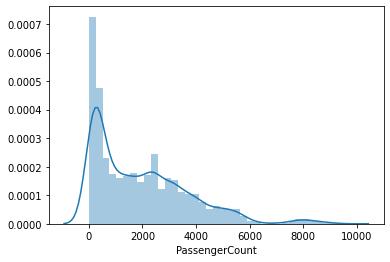

In [41]:
sns.distplot(inbound_df['PassengerCount'])

# Training a Linear Regression Model


In [42]:
y = inbound_df['PassengerCount']
inbound_df.drop('PassengerCount', axis=1, inplace=True)
X = inbound_df

In [43]:
X.head()

,DayNumberOfMonth,MonthNumberOfYear,CalendarQuater,Interest_Agriculture,Interest_Books,Interest_Business,Interest_Education,Interest_Family,Interest_Fasion,Interest_Foods,Interest_General,Interest_Health,Interest_IT,Interest_Residence,Interest_Seminar,Interest_Sports,Interest_Travel,Interest_Vehnicle,EventsGroup_Agriculture,EventsGroup_Books,EventsGroup_Business,EventsGroup_Education,EventsGroup_Family,EventsGroup_Fasion,EventsGroup_Foods,EventsGroup_General,EventsGroup_Health,EventsGroup_IT,EventsGroup_Residence,EventsGroup_Seminar,EventsGroup_Sports,EventsGroup_Travel,EventsGroup_Vehnicle,Interest_Total,Events_Total,Bang Krasor,Bang Phlu,Bang Rak Noi Tha It,Bang Rak Yai,Bang Son,...,Hua Lamphong,Huai Khwang,Kamphaeng Phet,Khlong Bang Phai,Khlong Toei,Lat Phrao,Lumphini,Ministry of Public Health,Nonthaburi Civic Center,Phahon Yothin,Phetchaburi,Phra Nang Klao Bridge,Phra Ram 9,Queen Sirikit National Convention Centre,Ratchadaphisek,Sai Ma,Sam Yaek Bang Yai,Sam Yan,Si Lom,Sukhumvit,Sutthisan,Talad Bang Yai,Tao Poon,Thailand Cultural Centre,Wong Sawang,Yaek Nonthaburi 1,Yaek Tiwanon,PH,WD,WE,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Early,Late,Mid
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [44]:
y.head()

0    186
1    359
2    299
3    431
4    233
Name: PassengerCount, dtype: int64

In [45]:
X.shape

(8864, 82)

In [46]:
y.shape

(8864,)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
print("X_train size : {}".format(X_train.shape))
print("X_test size : {}".format(X_test.shape))
print("y_train size : {}".format(y_train.shape))
print("y_test size : {}".format(y_test.shape))

X_train size : (6204, 82)
X_test size : (2660, 82)
y_train size : (6204,)
y_test size : (2660,)


In [50]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
lm.score(X,y)

0.8408982108206002

In [52]:
y_pred = lm.predict(X_test)

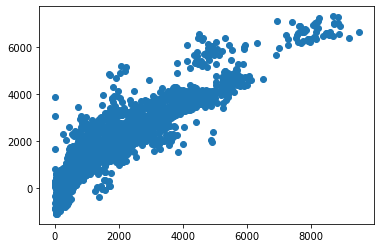

In [53]:
plt.scatter(y_test,y_pred)

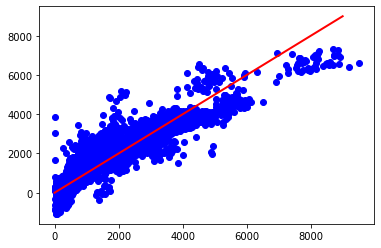

In [54]:
plt.scatter(y_test, y_pred,  color='blue')
plt.plot(range(0,9000), range(0,9000), color='red', linewidth=2)
plt.show()

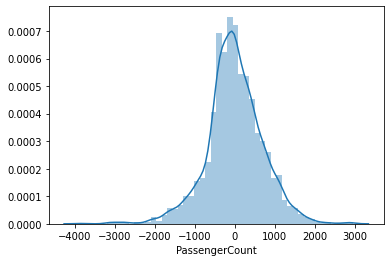

In [56]:
sns.distplot(y_test-y_pred, bins=50)

Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [57]:
metrics.mean_absolute_error(y_test, y_pred)

523.4916698018558

In [58]:
metrics.mean_squared_error(y_test, y_pred)

495650.514152278

In [59]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

704.024512465495

In [60]:
def mean_absolute_percentage_error(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred)

339.3566839653962

In [63]:
from scipy import stats
x = np.array([y_test, y_pred])
stats.median_absolute_deviation(x, axis=None)

1861.0728118968852